In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib.colors import LinearSegmentedColormap
#from matplotlib.lines import Line2D 


In [2]:
df = pd.read_csv('data/NEIC_global_1973-2014.csv', delimiter=';', header=1, decimal=',', index_col=0)
df.head()

Year  Month  Day  UT-Time  Latit  Longit  Depth  Magnitude
--                                                            
1   1973      1    1     3.77  -9.21  150.63   41.0        5.3
2   1973      1    1     5.37 -15.01 -173.96   33.0        5.0
3   1973      1    1     9.48 -22.16  -65.79  205.0        4.8
4   1973      1    1    11.71 -35.51  -16.21   33.0        6.0
5   1973      1    2     0.89  -9.85  117.43   66.0        5.5

# Waar komen over het algemeen de meeste aardbevingen voor, op het noordelijk of het zuidelijk halfrond?
   

In [3]:
df[df['Latit'] > 0].head()

Year  Month  Day  UT-Time  Latit  Longit  Depth  Magnitude
--                                                            
6   1973      1    2     2.45   1.03  126.21   61.0        5.4
7   1973      1    2     3.06  18.92 -104.13   33.0        4.6
8   1973      1    2     3.79   5.40  -82.54   30.0        5.2
9   1973      1    2    13.86  71.53   -5.75   33.0        4.5
10  1973      1    2    16.42  36.08   71.31  137.0        4.8

In [4]:
df[df['Latit'] > 0]['Year'].count() # Earthquakes on Northern Hemisphere

105896

In [5]:
df[df['Latit'] < 0]['Year'].count() # Earthquakes on Southern Hemisphere

99389

// waar komen de zwaarste voor?

In [6]:
df.groupby('Latit')['Magnitude'].max().sort_values(ascending = False).head()

Latit
 3.300     9.1
 38.300    9.0
-36.120    8.8
 2.090     8.6
 2.327     8.6
Name: Magnitude, dtype: float64

In [7]:
df.columns

Index(['Year', 'Month', 'Day', 'UT-Time', 'Latit', 'Longit', 'Depth',
       'Magnitude'],
      dtype='object')

##    • Op welke diepte komen de meeste aardbevingen voor?

In [8]:
counts_depth = df['Depth'].value_counts()
counts_depth.head()

33.0    46475
10.0    36911
35.0     8145
30.0     3146
40.0     1184
Name: Depth, dtype: int64

    • Kun je een verband ontdekken tussen diepte en magnitude?

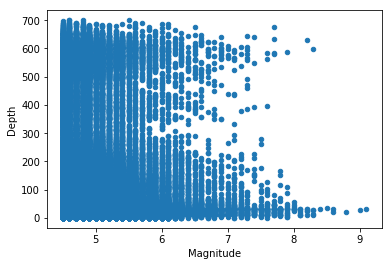

In [10]:
df.plot.scatter('Magnitude', 'Depth')
    

In [11]:
mean_mag = df.groupby('Depth')['Magnitude'].mean()
mean_mag

Depth
0.0000      5.195481
0.1000      4.900000
0.1078      4.590000
0.2000      5.400000
0.5000      4.700000
0.6000      4.500000
0.7000      4.500000
0.9000      5.500000
1.0000      4.844262
1.3000      4.700000
1.5000      4.800000
1.6000      4.900000
1.7000      4.900000
1.8000      4.800000
1.9000      4.800000
2.0000      4.875130
2.1000      4.700000
2.2000      4.950000
2.3800      4.600000
2.4000      4.740000
2.5000      5.000000
2.6000      4.550000
2.6300      4.900000
2.7000      4.733333
2.7300      6.100000
2.8000      5.300000
3.0000      4.850505
3.0200      5.400000
3.0300      5.300000
3.1000      4.866667
              ...   
668.0000    5.033333
669.0000    4.680000
670.0000    4.700000
671.0000    5.075000
672.0000    4.800000
673.0000    4.966667
674.0000    4.700000
675.0000    5.244444
676.0000    5.200000
677.0000    4.975000
677.1000    4.800000
678.0000    5.042857
679.0000    5.050000
680.0000    4.660000
681.0000    4.550000
682.0000    5.100000
683.000

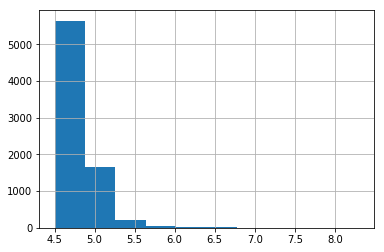

In [4]:
mean_mag.hist()

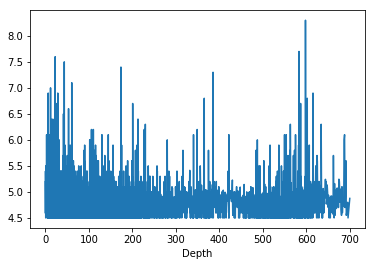

In [11]:
mean_mag.plot()

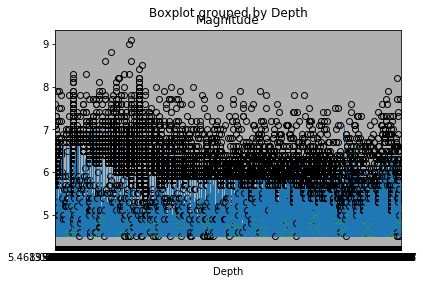

In [5]:
df.boxplot('Magnitude', 'Depth')

    • Is het aantal aardbevingen (per maand of per jaar) rond Haiti flink toegenomen sinds 2010?

19°00 N, 72°25 W  (capital)
Area: 18°00 -20°00N (120 nm ~ 200 km)
      71°25  - 73°25  (120 nm ~ 200 km)

In [45]:
df[(df['Latit'] > 18.00) & (df['Latit'] < 19.00)].sort_values(by='Magnitude', ascending = False).head(1)

Year  Month  Day  UT-Time  Latit  Longit  Depth  Magnitude
--                                                               
44690  1985      9   19    13.29  18.19 -102.53   27.0        8.0

In [48]:
EH = df[(df['Latit'].between(18.00, 19.00)) & (df['Longit'].between(-73.00, -71.00))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3a9151e10>]],
      dtype=object)

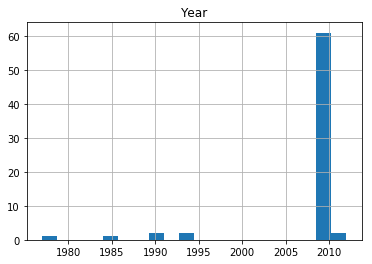

In [97]:
EH.hist('Year', bins=20)



In [69]:
print(plt.style.available)

['fast', 'seaborn-bright', 'seaborn-poster', 'seaborn-whitegrid', 'seaborn-notebook', 'Solarize_Light2', 'seaborn-pastel', 'seaborn-dark-palette', 'ggplot', 'seaborn-darkgrid', 'seaborn-talk', 'seaborn-muted', 'bmh', 'seaborn-paper', '_classic_test', 'seaborn-deep', 'seaborn-dark', 'seaborn', 'grayscale', 'seaborn-ticks', 'classic', 'seaborn-white', 'dark_background', 'seaborn-colorblind', 'fivethirtyeight']


In [64]:
EH['Year'].value_counts()

2010    61
2012     2
1990     2
1994     1
1993     1
1985     1
1977     1
Name: Year, dtype: int64

Het aantal aardbevingen lijkt niet te zijn toegenomen, alleen het aantal bevingen in dat jaar was enorm. 

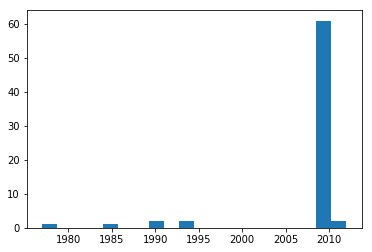

In [96]:
plt.hist(EH['Year'], bins=20) # geplot met matplotlib.pyplot
plt.show()


#    En rond Kathmandu (Nepal) sinds 2015?

In [101]:
df2 = pd.read_csv('data/query2015_2017.csv') #2015-2017

Kathmandu 27°42′41″N 85°18′31″E
Area: 26° - 28° N
      84° - 86° E

In [175]:
df2.head(1)

time  latitude  longitude  \
time                                                                      
2015-01-01T05:01:10.640Z  2015-01-01T05:01:10.640Z   38.8957   142.0405   

                          depth  mag magType  nst    gap  dmin  rms    ...     \
time                                                                   ...      
2015-01-01T05:01:10.640Z  41.39  4.8      mb  NaN  124.0  1.42  0.8    ...      

                                           updated                      place  \
time                                                                            
2015-01-01T05:01:10.640Z  2015-03-27T07:00:54.040Z  34km SE of Ofunato, Japan   

                                type horizontalError depthError  magError  \
time                                                                        
2015-01-01T05:01:10.640Z  earthquake             7.3        6.7      0.05   

                          magNst    status  locationSource magSource  
time                                                                  
2015-01-01T05:01:10.640Z   149.0  reviewed              us        us  

[1 rows x 22 columns]

In [242]:
Nepal = df2.loc[(df2['latitude'].between(26, 28)) & (df2['longitude'].between(84, 86))]
Nepal

time  latitude  longitude  \
time                                                                      
2015-04-25T06:15:22.910Z  2015-04-25T06:15:22.910Z   27.6285    85.5398   
2015-04-25T06:22:02.750Z  2015-04-25T06:22:02.750Z   27.8006    85.1141   
2015-04-25T06:25:55.260Z  2015-04-25T06:25:55.260Z   27.6870    85.5854   
2015-04-25T06:28:05.780Z  2015-04-25T06:28:05.780Z   27.7006    85.5043   
2015-04-25T06:29:46.130Z  2015-04-25T06:29:46.130Z   27.8478    85.0717   
2015-04-25T06:32:48.870Z  2015-04-25T06:32:48.870Z   27.7244    85.9479   
2015-04-25T06:37:58.690Z  2015-04-25T06:37:58.690Z   27.7435    85.8302   
2015-04-25T06:44:39.040Z  2015-04-25T06:44:39.040Z   27.5862    85.5012   
2015-04-25T06:53:42.750Z  2015-04-25T06:53:42.750Z   27.6720    85.2009   
2015-04-25T06:56:33.860Z  2015-04-25T06:56:33.860Z   27.8822    85.7505   
2015-04-25T07:07:59.920Z  2015-04-25T07:07:59.920Z   27.7879    85.9140   
2015-04-25T07:13:44.150Z  2015-04-25T07:13:44.150Z   27.6150    85.7307   
2015-04-25T07:16:55.060Z  2015-04-25T07:16:55.060Z   27.8818    85.6791   
2015-04-25T07:39:33.970Z  2015-04-25T07:39:33.970Z   27.6821    85.7383   
2015-04-25T07:47:01.480Z  2015-04-25T07:47:01.480Z   27.8172    85.5955   
2015-04-25T08:05:37.950Z  2015-04-25T08:05:37.950Z   27.8132    85.7943   
2015-04-25T08:16:59.230Z  2015-04-25T08:16:59.230Z   27.7014    85.7563   
2015-04-25T08:20:11.160Z  2015-04-25T08:20:11.160Z   27.8549    85.7931   
2015-04-25T08:20:48.800Z  2015-04-25T08:20:48.800Z   27.6429    85.1600   
2015-04-25T08:22:47.620Z  2015-04-25T08:22:47.620Z   27.8166    85.5666   
2015-04-25T08:29:24.560Z  2015-04-25T08:29:24.560Z   27.9351    84.6218   
2015-04-25T08:31:32.430Z  2015-04-25T08:31:32.430Z   27.6708    85.9539   
2015-04-25T08:55:55.960Z  2015-04-25T08:55:55.960Z   27.5866    85.5058   
2015-04-25T09:03:14.960Z  2015-04-25T09:03:14.960Z   27.8743    85.3426   
2015-04-25T09:22:36.900Z  2015-04-25T09:22:36.900Z   27.7192    85.7503   
2015-04-25T09:30:29.690Z  2015-04-25T09:30:29.690Z   27.9945    85.5209   
2015-04-25T10:40:35.550Z  2015-04-25T10:40:35.550Z   27.6033    85.9565   
2015-04-25T10:53:43.530Z  2015-04-25T10:53:43.530Z   27.8061    85.8842   
2015-04-25T11:23:47.560Z  2015-04-25T11:23:47.560Z   27.6483    85.4309   
2015-04-25T12:17:54.790Z  2015-04-25T12:17:54.790Z   27.9261    85.4490   
...                                            ...       ...        ...   
2015-04-25T23:16:15.450Z  2015-04-25T23:16:15.450Z   27.7993    84.8715   
2015-04-26T04:58:40.040Z  2015-04-26T04:58:40.040Z   27.9966    84.7082   
2015-04-26T07:26:04.190Z  2015-04-26T07:26:04.190Z   27.7004    85.9136   
2015-04-26T07:36:26.570Z  2015-04-26T07:36:26.570Z   27.7555    85.9822   
2015-04-26T08:40:55.820Z  2015-04-26T08:40:55.820Z   27.7307    85.8540   
2015-04-26T13:11:15.170Z  2015-04-26T13:11:15.170Z   27.8112    85.4088   
2015-04-26T14:44:50.510Z  2015-04-26T14:44:50.510Z   27.6860    85.9657   
2015-04-26T16:26:06.730Z  2015-04-26T16:26:06.730Z   27.8297    85.8650   
2015-04-26T22:32:34.720Z  2015-04-26T22:32:34.720Z   27.5298    85.6751   
2015-04-29T11:27:45.310Z  2015-04-29T11:27:45.310Z   27.8640    85.4086   
2015-05-04T01:15:07.070Z  2015-05-04T01:15:07.070Z   27.6326    85.9746   
2015-05-08T00:32:33.960Z  2015-05-08T00:32:33.960Z   27.6418    85.9790   
2015-05-12T08:13:54.600Z  2015-05-12T08:13:54.600Z   27.7629    85.7574   
2015-05-12T12:28:22.930Z  2015-05-12T12:28:22.930Z   27.6751    85.9931   
2015-05-12T21:25:11.930Z  2015-05-12T21:25:11.930Z   27.7830    84.6384   
2015-05-15T01:42:42.800Z  2015-05-15T01:42:42.800Z   27.9719    84.7499   
2015-05-16T03:39:26.920Z  2015-05-16T03:39:26.920Z   27.6386    85.7130   
2015-05-20T09:02:32.260Z  2015-05-20T09:02:32.260Z   27.3231    85.0483   
2015-05-22T10:59:33.780Z  2015-05-22T10:59:33.780Z   27.9555    84.9671   
2015-05-29T10:00:00.270Z  2015-05-29T10:00:00.270Z   27.9798    84.7819   
2015-06-11T16:12:20.290Z  2015-06-11T16:12:20.290Z   27.8321    85.5836

In [275]:
Nepal['Year'] = pd.DatetimeIndex(Nepal['time']).year

/mnt/HDD/Documents/ITvitae/Data_science/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
Nepal_1 = df.loc[(df['Latit'].between(26, 28)) & (df['Longit'].between(84, 86))]
Nepal_1

Year  Month  Day  UT-Time  Latit  Longit  Depth  Magnitude
--                                                                
11930   1976      9   12    15.60  27.67   85.75   33.0        4.8
19023   1978     10    4    13.89  27.83   85.96   33.0        5.2
31848   1982      8    3     8.06  27.90   85.46   33.0        4.6
37495   1984      1    6    23.80  27.78   84.74   33.0        4.5
45933   1985     12   23    13.82  27.61   85.72   45.0        4.6
46108   1986      1    6     9.84  27.80   85.39   33.0        4.5
54120   1987     11   25    19.34  27.95   85.88   33.0        4.6
55685   1988      4   11    12.19  27.52   85.86   38.0        4.9
57749   1988     10   29     9.18  27.87   85.65   17.0        5.4
59228   1989      3    8     7.35  28.00   84.03   33.0        4.5
77426   1993      7    5    22.18  27.94   85.12   33.0        4.7
93589   1997      1   31    20.04  27.95   85.13   22.0        5.2
94214   1997      3   24    21.47  27.89   84.99   33.0        4.5
99704   1998      6   27     9.09  27.67   85.57   33.0        4.9
102543  1999      3   19     5.89  27.75   85.61   33.0        4.5
113487  2001      7   16    16.21  27.96   85.18   33.0        5.0
125928  2004      1    3    13.24  27.74   85.93   17.0        4.9
153063  2007     10   29     9.82  27.94   85.38   16.0        4.7

In [279]:
Nepal_1.info()
Nepal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 11930 to 153063
Data columns (total 8 columns):
Year         18 non-null int64
Month        18 non-null int64
Day          18 non-null int64
UT-Time      18 non-null float64
Latit        18 non-null float64
Longit       18 non-null float64
Depth        18 non-null float64
Magnitude    18 non-null float64
dtypes: float64(5), int64(3)
memory usage: 1.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2015-04-25T06:15:22.910Z to 2017-02-27T04:21:41.730Z
Data columns (total 23 columns):
time               64 non-null object
latitude           64 non-null float64
longitude          64 non-null float64
depth              64 non-null float64
mag                64 non-null float64
magType            64 non-null object
nst                0 non-null float64
gap                64 non-null float64
dmin               64 non-null float64
rms                64 non-null float64
net                64 non-null object
id            

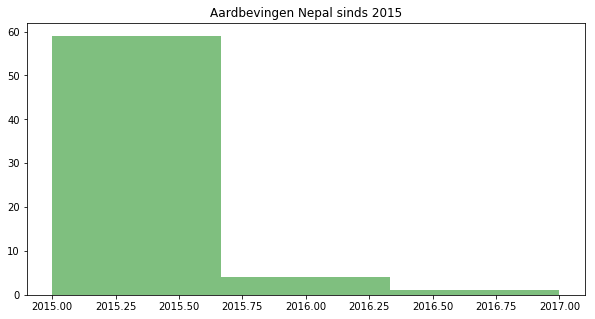

In [274]:
plt.figure(figsize=(10,5))
plt.title('Aardbevingen Nepal sinds 2015')
plt.hist(Nepal['Year'], bins = 3, color='green',alpha=0.5)
#plt.xticks(range(3))
plt.show()

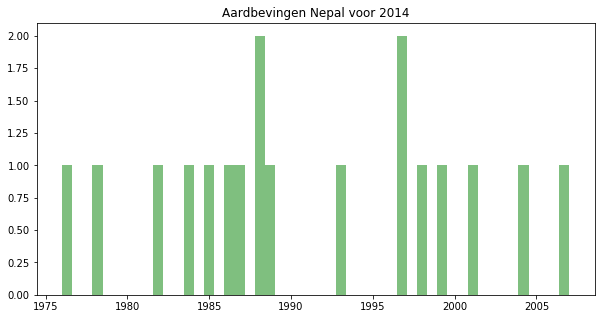

In [239]:
plt.figure(figsize=(10,5))
plt.title('Aardbevingen Nepal voor 2014')
plt.hist(Nepal_1['Year'], bins = 50, color='green',alpha=0.5)
plt.show()

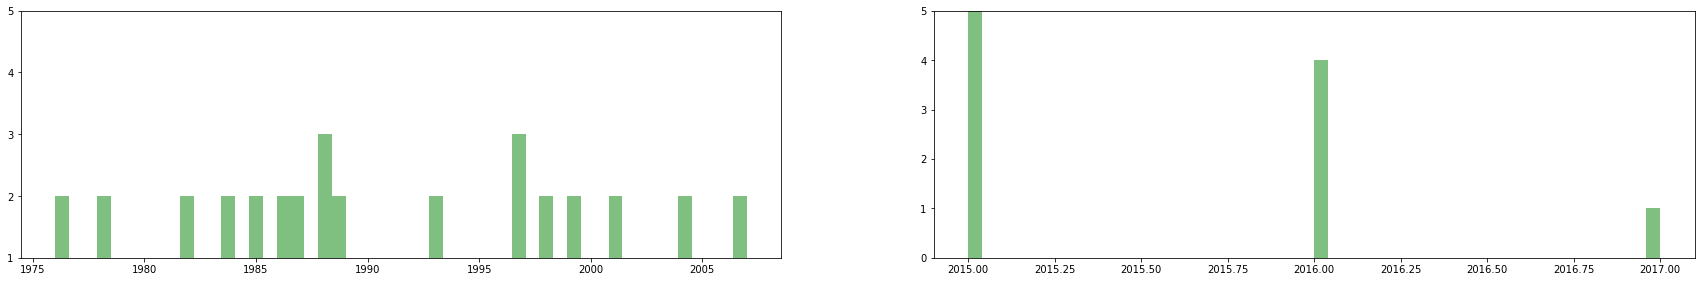

In [353]:
plt.figure(figsize=(30,10))
plt.title('aardbevingen voor en na 2014')
# subplot 1
ax1 = plt.subplot2grid((2, 2), (0, 0)) #grid geometry + location
#ax1.title('Aardbevingen voor 2014') 
ax1.hist(Nepal_1['Year'], bins = 50, color='green',alpha=0.5)
plt.yticks(range(5), ['1', '2', '3', '4', '5'])

#subplot2
ax2 = plt.subplot2grid((2, 2), (0, 1)) #grid geometry + location
#ax2.title('Aardbevingen na 2014')
ax2.hist(Nepal['Year'], bins = 50, color='green',alpha=0.5)
plt.ylim([0,5])

plt.show()

In [266]:
N2 = Nepal_1['Year'].value_counts()
N3 = Nepal['Year'].value_counts()
N4 = pd.concat([N3,N2])
N4

2015    59
2016     4
2017     1
1997     2
1988     2
1982     1
1978     1
1976     1
2007     1
2004     1
2001     1
1999     1
1998     1
1993     1
1989     1
1987     1
1986     1
1985     1
1984     1
Name: Year, dtype: int64

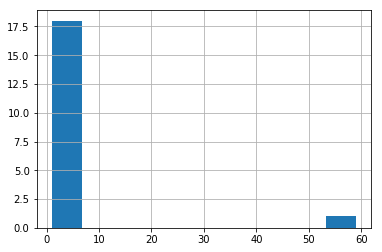

In [273]:
N4.hist()